# Wstęp do Sztucznej Inteligencji - rok akademicki 2018/2019

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia, w szczególności, że uzupełniłeś wszystkie pola `YOUR CODE HERE` oraz `YOUR ANSWER HERE`.

## Temat: Wnioskowanie oparte na wiedzy niepewnej. Wnioskowanie bayesowskie
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

### Uwaga:
Osoby, które jeszcze tego nie zrobiły, muszą doinstalować pakiet [pymc3](https://docs.pymc.io/notebooks/getting_started.html#Installation)

```bash 
pip install pymc3
```

### Wnioskowanie probabilistyczne
Wnioskowanie probabilistyczne nazywamy także wnioskowaniem bayesowskim, ze względu na kluczową rolę, jaką w nim pełni wzór Bayesa. Jest to metoda przetwarzania wiedzy niepewnej oparta na bezpośrednim wykorzystaniu rachunku prawdopodobieństwa, w której poszczególnym stwierdzeniom przypisuje się prawdopodobieństwo ich prawdziwości.

__Wzór na prawdopodobieństwo warunkowe__:

$$ P(A|B) = \frac{P(A\cap B)}{P(B)} \stackrel{z}{=}\frac{P(A)P(B)}{P(B)},$$
gdzie równość $\stackrel{z}{=}$ zachodzi przy założeniu niezależności zdarzeń $A$ i $B$.

__Wzór Bayesa__ opisuje następującą zależność prawdopodobieństw warunkowych:

$$ P(A|B)=\frac{P(B|A)P(A)}{P(B)}.$$

__Prawdopodobieństwo całkowite__:

Jeżeli zdarzenia $B_1,B_2,\ldots,B_n$ są parami rozłączne oraz mają prawdopodobieństwa dodatnie, które sumują się do jedynki, to dla dowolnego zdarzenia $A$ zachodzi wzór:

$$P(A)=P(A|B_1)P(B_1)+P(A|B_2)P(B_2)+\ldots +P(A|B_n)P(B_n).$$

__Zastosowanie we wnioskowaniu__:

Załóżmy, że bierzemy pod uwagę skończoną liczbę hipotez $H_1,\ldots,H_n$ parami niezależnych i wyczerpujących wszystkie możliwości. Oraz dysponujemy skończoną liczbą przesłanek $E_1,\ldots,E_m$, o których wiemy, że zaszły. Wówczas z wzoru Bayesa przez zastosowanie wzoru na prawdopodobieństwo całkowite można wyprowadzić następujący wzór ogólny:

$$P(H_i|E_1,\ldots,E_m)=\frac{P(E_1,\ldots, E_m|H_i)P(H_i)}{\sum\limits_{j=0}^nP(E_1,\ldots,E_m|H_j)P(H_j)}.$$

Oznacza to, że znając prawdopodobieństwa a priori hipotez $P(H_i)$ oraz prawdopodobieństwa warunkowe $P(E_j|H_i)$ możemy wyznaczyć prawdopodobieństwa a posteriori hipotez $P(H_i|E_j)$.

### Naiwny model Bayesa

Ostatnie zdanie poprzedniego punktu można przyjąć jedynie z pewnym zastrzeżeniem. $P(A \cap B) = P(A)P(B)$ wtedy i tylko wtedy jeśli $A$ oraz $B$ są niezależne. Zależność ta jest również prawdziwa warunkowo, tzn. $P(A \cap B|C) = P(A|C)P(B|C)$ dla pewnego zdarzenia $C$, wtedy i tylko wtedy jeśli $A$ oraz $B$ są niezależne pod warunkiem $C$. 

Zatem, w ogólnym przypadku oryginalny wzór Bayesa

$$P(H_i|E_1,\ldots,E_m)=\frac{P(E_1,\ldots, E_m|H_i)P(H_i)}{\sum\limits_{j=0}^nP(E_1,\ldots,E_m|H_j)P(H_j)}.$$

nie jest równoważny

$$P(H_i|E_1,\ldots,E_m)=\frac{P(E_1|H_i)P(E_2|H_i)\ldots P(E_m|H_i)P(H_i)}{\sum\limits_{j=0}^nP(E_1|H_j)P(E_2|H_j)\ldots P(E_m|H_j)P(H_j)}.$$

Są one równoważne jedynie jeśli przesłanki $E$ są niezależne pod warunkiem każdej $H_i$. 

Drugi wzór jest jednak o wiele korzystniejszy w praktyce, jako iż łatwiej jest estymować prawdopodobieństwa dla pojedynczych $E$ niż rozkłady łączne dla $E_1,\ldots,E_m$. Jeśli stosujemy drugi wzór mimo braku niezależności $E$, mamy do czynienia z pewną naiwnością - naiwnym liczeniem na to, iż mimo naruszenia ścisłego matematycznego wymogu niezależności, model i tak będzie działał. I tak też często jest. Jakość działania takiego naiwnego modelu zależy m.in. od tego, jak bardzo odbiegamy od ideału całkowitej niezależności $E$.

### Uwaga:
We wszystkich poniższych przykładach, zwróć uwagę, kiedy korzystamy z tego założenia.

__Skąd prawdopodobieństwa?__

Zarówno prawdopodobieństwa a priori jak i warunkowe, potrzebne do zastosowania wzoru Bayesa, można otrzymać od ekspertów bądź też szacować na podstawie danych historycznych.

### Przykład: Test medyczny

Pewna choroba $X$ dotyczy $1\%$ populacji.

Test wykrywa chorobę ze skutecznością $99\%$ (ang. recall, czułość testu, czyli jego zdolność wykrycia choroby pod warunkiem, że dana osoba rzeczywiście jest chora).

Test błędnie wykrywa chorobę w przypadku $2\%$ zdrowych ludzi (ang. false alarm rate, $FAR$, przypadek fałszywie pozytywny; specyficzność testu jest pojęciem pokrewnym, jest to zdolność testu wskazania braku choroby dla osoby rzeczywiście zdrowej, czyli specyficzność = $1 - FAR$).

Po wykonaniu testu, Pan $Z$ dostaje wynik pozytywny. 

Jakie jest prawdopodobieństwo, że Pan $Z$ jest chory?

Należy skorzystać ze wzoru Bayesa.

$H$ - Pan $Z$ jest chory

$E$ - wynik testu jest pozytywny

$P(H|E)$ - to chcemy policzyć

$P(H)$ = 0.01, zatem $P(\neg H)$ = 0.99

$P(E|H)$ = 0.99

$P(E|\neg H)$ = 0.02

$$P(H|E) = \frac{P(E|H)P(H)}{P(E)} = \frac{P(E|H)P(H)}{P(E|H)P(H) + P(E|\neg H)P(\neg H)}$$

In [1]:
p_H = 0.01
p_notH = 0.99
p_E_H = 0.99
p_E_notH = 0.02

p_H_E = p_E_H*p_H/(p_E_H*p_H + p_E_notH*p_notH)

print('Prawdopodobieńśtwo choroby Pana Z =',p_H_E)

Prawdopodobieńśtwo choroby Pana Z = 0.3333333333333333


### Przykład: Prognoza pogody

Hipotezy:

- $H_1$ pogoda jutro będzie deszczowa,
- $H_2$ pogoda jutro będzie słoneczna.

Zaobserwowane przesłanki:

- $E_1$ pogoda dziś słoneczna,
- $E_2$ opady dziś niskie,
- $E_3$ temperatura dziś wysoka,
- $E_4$ niebo dziś bezchmurne.

Prawdopodobieństwa a priori:

$P(H_1) = P(H_2) = 0.5$,

$P(E_1|H_1) = 0.2,\quad \qquad P(E_1|H_2) = 0.33,$

$P(E_2|H_1) = 0.032,\qquad P(E_2|H_2) = 0.8,$

$P(E_3|H_1) = 0.75,\ \ \qquad P(E_3|H_2) = 0.225,$

$P(E_4|H_1) = 0.765,\qquad P(E_4|H_2) = 0.85.$

Prawdopodobieństwa a posteriori:

$$ P(H_1|E_1, E_2, E_3, E_4) = \frac{0.2\cdot 0.032\cdot 0.75\cdot 0.765 \cdot 0.5}{0.2\cdot 0.032\cdot 0.75\cdot 0.765 \cdot 0.5 + 0.33\cdot 0.8\cdot 0.225\cdot 0.85\cdot 0.5}=0.068.$$

$$ P(H_2|E_1, E_2, E_3, E_4) = \frac{0.33\cdot 0.8\cdot 0.225\cdot 0.85\cdot 0.5}{0.2\cdot 0.032\cdot 0.75\cdot 0.765 \cdot 0.5 + 0.33\cdot 0.8\cdot 0.225\cdot 0.85\cdot 0.5}=0.932.$$

### Przykład z wykładu ([J. Arabas, P. Cichosz](http://wazniak.mimuw.edu.pl/index.php?title=Sztuczna_inteligencja/SI_Modu%C5%82_4_-_Wnioskowanie_na_podstawie_wiedzy_niepewnej_i_niepe%C5%82nej)): Diagnostyka grypy

Rozważmy następującą prostą ilustrację przedstawionego mechanizmu wnioskowania, traktując rozważane w niej przykładowe fakty (przesłanki) i hipotezy z należnym dystansem. Weźmiemy pod uwagę sytuację, w której diagnozując dolegliwości pacjenta ograniczono zbiór możliwych diagnoz do następujących dwóch wykluczających się hipotez:

- $H_1$ pacjent jest chory na grypę,

- $H_2$ pacjent nie jest chory na grypę. 

Podstawą do wnioskowania mogą być następujące pojedyncze fakty:

- $E_1$ pacjent ma katar, 

- $E_2$ pacjent ma kaszel, 

- $E_3$ pacjent ma gorączkę. 

Przyjmijmy, że dostarczający wiedzę do systemu diagnostycznego ekspert ustalił następujące wartości prawdopodobieństw:

$P(H_1) = 0.1,\qquad\quad\  P(H_2) = 0.9,$

$P(E_1|H_1) =  0.5,\qquad P(E_1|H_2) =0.3,$

$P(E_2|H_1) =  0.3,\qquad P(E_2|H_2) = 0.3,$

$P(E_3|H_1) =  0.8,\qquad P(E_3|H_2) =  0.4.$

Na tej podstawie możemy obliczyć prawdopodobieństwa faktów:

$P(E_1) = P(H_1)P(E_1|H_1) + P(H_2)P(E_1|H_2) = 0.1\cdot 0.5+0.9\cdot 0.3 = 0.32,$

$P(E_2) = P(H_1)P(E_2|H_1) + P(H_2)P(E_2|H_2) = 0.1\cdot 0.3+0.9\cdot 0.3 = 0.3,$

$P(E_3) = P(H_1)P(f_3|H_1) + P(H_2)P(E_3|H_2) = 0.1\cdot 0.8+0.9\cdot 0.4 = 0.44,$ 

Aby wyznaczyć prawdopodobieństwa a posteriori rozważanych hipotez na podstawie każdego z pojedynczych objawów stosujemy bezpośrednio wzór Bayesa:

$$P(H_1|E_1) = \frac{P(H_1)P(E_1|H_1)}{P(E_1)} = \frac{0.1\cdot 0.5}{0.32} = 0.15625,$$

$$P(H_1|E_2) = \frac{P(H_1)P(E_2|H_1)}{P(E_2)} = \frac{0.1\cdot 0.3}{0.33} = 0.1,$$

$$P(H_1|E_3) = \frac{P(H_1)P(E_3|H_1)}{P(E_3)} = \frac{0.1\cdot 0.8}{0.44} = 0.18182.$$

Można również obliczyć prawdopodobieństw a posteriori rozważanych hipotez na podstawie dowolnych dwóch objawów oraz wszystkich trzech objawów (analogicznie jak w przykładzie wyżej).

Co powiesz odnośnie niezależności $E_1$, $E_2$ oraz $E_3$ w tym przypadku?

## Uwaga
W praktycznych zagadnieniach, rozważane modele są dużo bardziej skomplikowane, a modelowane fakty mogą przyjmować wartości z dowolnymi rozkładami prawdopodobieństw, zarówno dyskretnymi jaki i ciągłymi, ponadto mogą między nimi występować przeróżne zależności. Wówczas obliczenie odpowiednich prawdopodobieństw nie jest już takie proste, a czasami nawet niemożliwe do obliczenia w sposób analityczny. W takich przypadkach odpowiednie prawdopodobieństwa oblicza się przy użyciu symulacji komputerowych.

## Symulacja powyższego przykładu w języku Python z wykorzystaniem modułu [pymc3](https://docs.pymc.io/)  

#### Tworzenie modelu:

In [2]:
import pymc3 as pm
# pojawiającym komunikatem o theano nie trzeba się przejmować

with pm.Model() as grypa_model:
    # zmienna grypa o rozkładzie Bernoulliego z prawd. 0.1, 
    # z prawd. 0.1 True (grypa), z prawd. 0.9 False (nie grypa)
    grypa = pm.Bernoulli('grypa', 0.1)

    # prawd. kataru pod warunkiem grypy
    # jeżeli grypa to p_katar=0.5, jeżeli nie grypa to p_katar=0.3
    p_katar = pm.Deterministic('p_katar', pm.math.switch(grypa, 0.5, 0.3))
    # zmienna katar o rozkładie Bernoulliego
    katar = pm.Bernoulli('katar', p_katar)

    # prawd. kaszlu pod warunkiem grypy
    # jeżeli grypa to p_kaszel=0.3, jeżeli nie grypa to p_kaszel=0.3
    p_kaszel = pm.Deterministic('p_kaszel', pm.math.switch(grypa, 0.3, 0.3))
    # zmienna kaszel o rozkładie Bernoulliego
    kaszel = pm.Bernoulli('kaszel', p_kaszel)

    # prawd. goraczki pod warunkiem grypy
    # jeżeli grypa to p_goraczka=0.8, jeżeli nie grypa to p_goraczka=0.4
    p_goraczka = pm.Deterministic('p_goraczka', pm.math.switch(grypa, 0.8, 0.4))
    goraczka = pm.Bernoulli('goraczka', p_goraczka)

/opt/conda/lib/python3.6/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


#### Symulacje:

In [3]:
with grypa_model:
    trace = pm.sample(20000, chains=1)  #liczba symulacji, są inne parametry warto sprawdzić w dokumentacji

Sequential sampling (1 chains in 1 job)
BinaryGibbsMetropolis: [grypa, katar, kaszel, goraczka]
100%|██████████| 20500/20500 [00:36<00:00, 559.80it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


Wszystkie wyniki symulacji przechowywane są w obiekcie `trace`.

In [4]:
trace

<MultiTrace: 1 chains, 20000 iterations, 7 variables>

In [5]:
# zdefiniowane zmienne w naszym modelu
trace.varnames

['grypa', 'katar', 'kaszel', 'goraczka', 'p_katar', 'p_kaszel', 'p_goraczka']

In [6]:
# wygenerowana ścieżka dla zmiennej grypa
trace.get_values('grypa') # zwaraca obiekt ndarray

array([0, 0, 0, ..., 0, 0, 0])

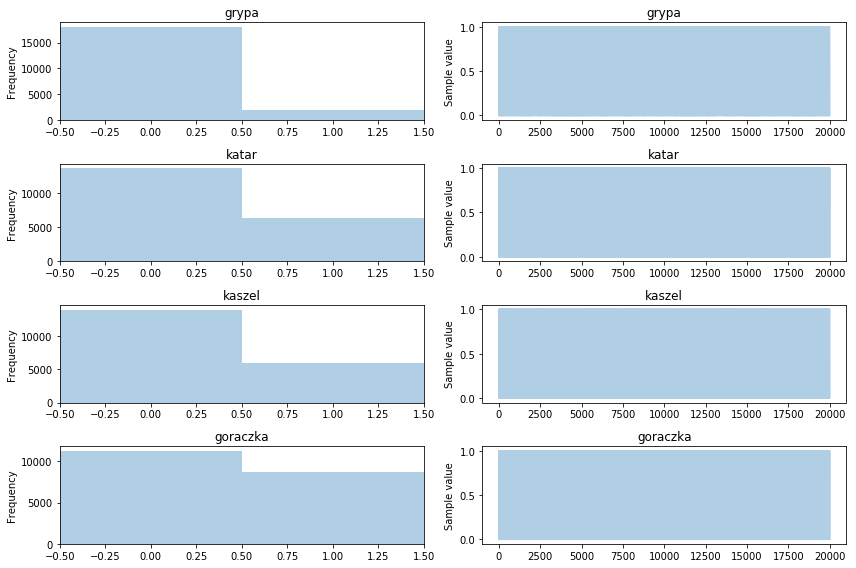

In [7]:
# w module pymc3 dostępne są metody do wygernerowania różnego rodzaju wykresów np.
axs = pm.traceplot(trace, varnames=['grypa', 'katar', 'kaszel', 'goraczka'])

#### Obliczamy interesujące nas prawdopodobieństwa i porównujemy z przykładem, proste zliczanie:
Prawdopodobieństawa bezwarunkowe:

In [8]:
# bezwarunkowe prawd. grypy (z założenia powinno być 0.1)
p_grypa = trace['grypa'].sum()/len(trace['grypa'])
print('p_grypa:', p_grypa)

# bezwarunkowe prawd. kataru (0.32)
p_katar = trace['katar'].sum()/len(trace['katar'])
print('p_katar', p_katar)

# bezwarunkowe prawd. kaszlu (0.3)
p_kaszel = trace['kaszel'].sum()/len(trace['kaszel'])
print('p_kaszel', p_kaszel)

# bezwarunkowe prawd. goraczki (0.44)
p_goraczka = trace['goraczka'].sum()/len(trace['goraczka'])
print('p_goraczka', p_goraczka)

p_grypa: 0.09885
p_katar 0.31955
p_kaszel 0.3009
p_goraczka 0.4364


Prawdopodobieństawa warunkowe:

In [9]:
# prawd. grypy pod warunkiem wystąpienia kataru (0.15625)
p_grypa_katar = (trace['grypa']*trace['katar']).sum()/trace['katar'].sum()
print('p_grypa_katar:', p_grypa_katar)

# prawd. grypy pod warunkiem wystąpienia kaszlu (0.1)
p_grypa_kaszel = (trace['grypa']*trace['kaszel']).sum()/trace['kaszel'].sum()
print('p_grypa_kaszel:', p_grypa_kaszel)

# prawd. grypy pod warunkiem wystąpienia goraczki (0.18182)
p_grypa_goraczka = (trace['grypa']*trace['goraczka']).sum()/trace['goraczka'].sum()
print('p_grypa_goraczka:', p_grypa_goraczka)

# prawd. grypy pod warunkiem wystąpienia kataru i goraczki (0.284(09))
p_grypa_katar_goraczka = (trace['grypa']*trace['katar']*trace['goraczka']).sum()/(trace['katar']*trace['goraczka']).sum()
print('p_grypa_katar_goraczka:', p_grypa_katar_goraczka)

p_grypa_katar: 0.157878266312
p_grypa_kaszel: 0.0997008973081
p_grypa_goraczka: 0.179766269478
p_grypa_katar_goraczka: 0.275213675214


__Jak widać mniej więcej się zgadza.__

## Sieci przekonań
Dla ułatwienia można zbudować graf przedstawiający rzeczywiste zależności między zmiennymi losowymi, i po wyznaczeniu ich prawdopodobieństw warunkowych efektywnie obliczać prawdopodobieństwa innych zdarzeń.

__Siecią przekonań__ (belief network, Bayesian network, probabilistic network) nazywamy następujący graf:
- węzłami sieci są zmienne losowe,
- łuki sieci są skierowane, i łuk $X \to Y$ ma intuicyjne znaczenie: "zmienna $X$ ma bezpośredni wpływ na $Y$",
- każdy węzeł $X$ ma związaną z nim tablicę prawdopodobieństw warunkowych określających wpływ wywierany na $X$ przez jego rodziców (poprzedników w grafie),
- sieć nie może mieć cykli (skierowanych).

Budowa sieci polega na wyznaczeniu jej topologii, oraz prawdopodobieństw warunkowych dla węzłów, dla których istnieją bezpośrednie zależności.

__Przykład:__
![sprinkler.PNG](http://torus.uck.pk.edu.pl/~amarsz/images/sprinkler.PNG)

Sequential sampling (1 chains in 1 job)
BinaryGibbsMetropolis: [rain, sprinkler, grass_wet]
100%|██████████| 20500/20500 [00:28<00:00, 726.95it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


p_rain_wet: 0.380724857243
p_sprinkler_wet: 0.623820067591
p_not_sprinkler_rain_wet: 0.0


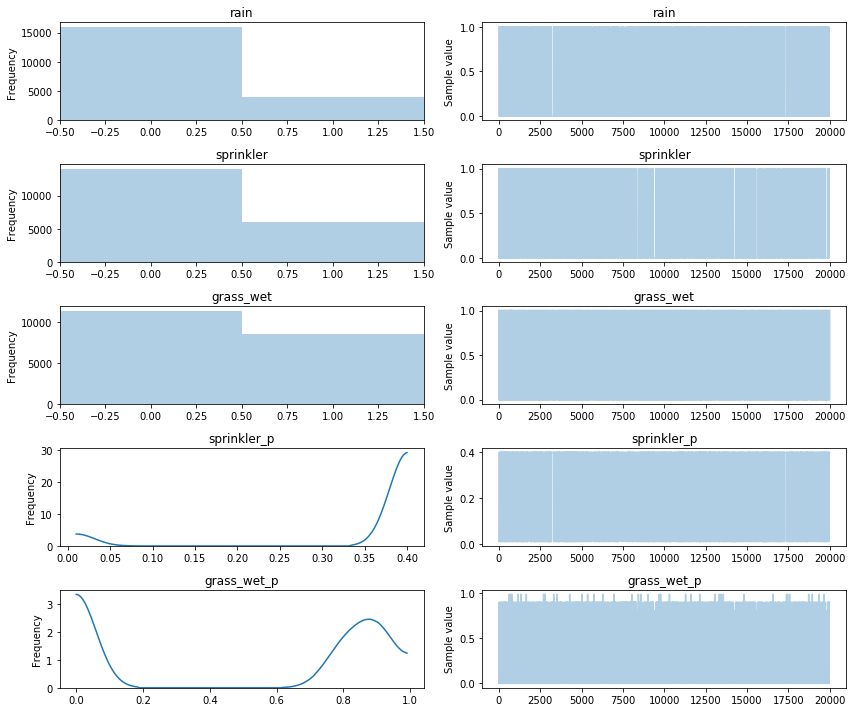

In [10]:
# źródło:
# https://bugra.github.io/work/notes/2014-05-23/simple-bayesian-network-via-monte-carlo-markov-chain-mcmc-pymc/
# https://gist.github.com/cs224/9a19b4ba2c7511e317be90c32a4d40d7
import pymc3 as pm
import numpy as np


with pm.Model() as model:
    rain = pm.Bernoulli('rain', 0.2)
    sprinkler_p = pm.Deterministic('sprinkler_p', pm.math.switch(rain, 0.01, 0.40))
    sprinkler = pm.Bernoulli('sprinkler', sprinkler_p)
    grass_wet_p = pm.Deterministic('grass_wet_p', pm.math.switch(rain, pm.math.switch(sprinkler, 0.99, 0.80), pm.math.switch(sprinkler, 0.90, 0.0)))
    grass_wet = pm.Bernoulli('grass_wet', grass_wet_p)

    trace = pm.sample(20000, chains=1)

pm.traceplot(trace)

# Jakie jest prawdopodobieństwo, że podało jeśli wiadomo, że trawa jest mokra? 
p_rain_wet = (trace['rain']*trace['grass_wet']).sum()/trace['grass_wet'].sum()
print('p_rain_wet:', p_rain_wet)

# Jakie jest prawdopodobieństwo, że włączył się spryskiwacz jeśli wiadomo, że trawa jest mokra? 
p_sprinkler_wet = (trace['sprinkler']*trace['grass_wet']).sum()/trace['grass_wet'].sum()
print('p_sprinkler_wet:', p_sprinkler_wet)

# Jakie jest prawdopodobieństwo, że trawa jest mokra jeśli wiadomo, że spryskiwacz się nie włączył oraz nie padało?
p_not_sprinkler_rain_wet = (trace['grass_wet']*np.logical_not(trace['sprinkler'])*np.logical_not(trace['rain'])).sum()/(np.logical_not(trace['sprinkler'])*np.logical_not(trace['rain'])).sum()
print('p_not_sprinkler_rain_wet:', p_not_sprinkler_rain_wet)

## Zadanie 1 (10pkt.):
Zapożyczone z ćwiczeń do wykładu [Arabas, Cichosz](http://wazniak.mimuw.edu.pl/index.php?title=Sztuczna_inteligencja/SI_%C4%86wiczenia_4)

### Zamodeluj i odpowiedz na pytania.

W śledztwie dotyczącym zabójstwa inspektor Bayes rozważa dwie hipotezy:

- $H_1$ główny podejrzany zabił,
- $H_2$ główny podejrzany nie zabił, 

oraz następujące możliwe fakty:

- $E_1$ na miejscu zbrodni znaleziono odciski palców głównego podejrzanego,
- $E_2$ główny podejrzany nie ma alibi na czas popełnienia zabójstwa,
- $E_3$ główny podejrzany miał motyw zabicia ofiary,
- $E_4$ główny podejrzany był widziany w sądziedztwie miejsca, w którym mieszka nielegalny handlarz bronią,
- $E_5$ świadek zbrodni podał rysopis zabójcy nie pasujący do głównego podejrzanego. 

Zależności między takimi faktami a hipotezami opisują następujące prawdopodobieństwa:

$P(E_1|H_1)=0.7,\qquad P(E_1|H_2)=0.3,$

$P(E_2|H_1)=0.8,\qquad P(E_2|H_2)=0.4,$

$P(E_3|H_1)=0.9,\qquad P(E_3|H_2)=0.5,$

$P(E_4|H_1)=0.4,\qquad P(E_4|H_2)=0.2,$

$P(E_5|H_1)=0.2,\qquad P(E_5|H_2)=0.4.$ 

__W którym przypadku prawdopodobieństwo popełnienia zabójstwa byłoby największe?__

1. Gdyby znaleziono na miejscu zbrodni jego odciski palców.
2. Gdyby stwierdzono, że nie miał alibi i miał motyw.
3. Gdyby znaleziono na miejscu zbrodni jego odciski palców oraz stwierdzono, że był widziany w sąsiedztwie miejsca, w którym mieszka nielegalny handlarz bronią, ale świadek zbrodni podał rysopis zabójcy nie pasujący do głównego podejrzanego.

#### TWÓJ PROGRAM:

Sequential sampling (1 chains in 1 job)
BinaryGibbsMetropolis: [zabil, odciski, not_alibi, motyw, widziany, bledny_rysopis]
100%|██████████| 20500/20500 [01:16<00:00, 267.02it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


p_zabil_odciski:  0.696189906244
p_zabil_motyw_not_alibi:  0.790084272737
p_trzecie:  0.702564102564


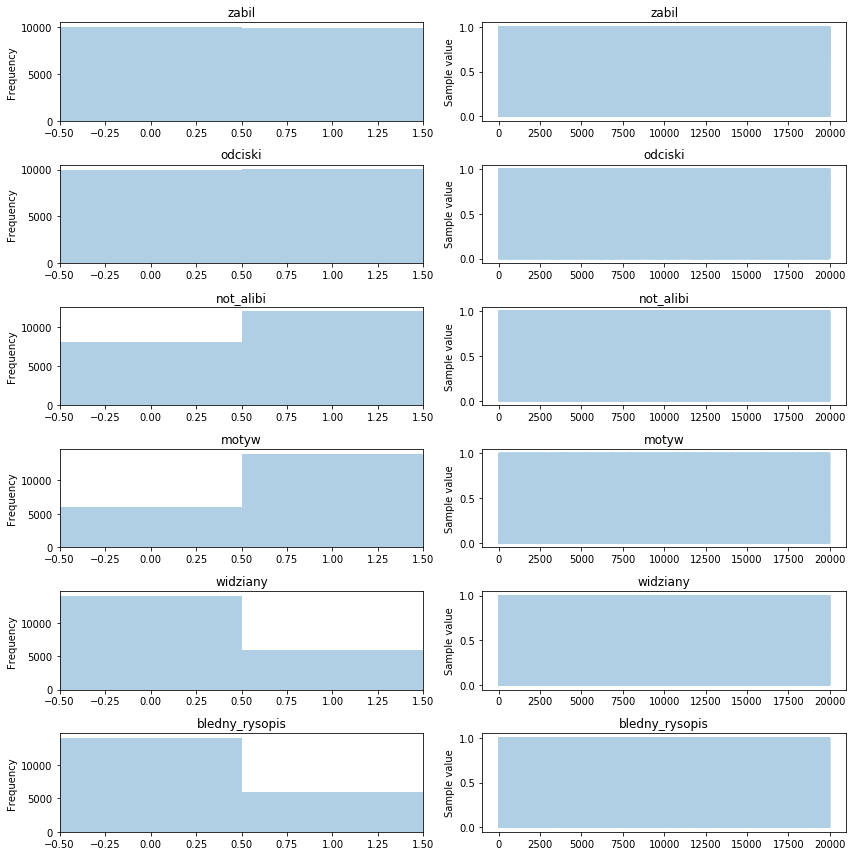

In [52]:
import pymc3 as pm
import numpy as np

with pm.Model() as bayes_model:
    bayes = pm.Bernoulli('zabil', 0.5)
    
    # prawd. odciskow palcow pod warunkiem zabojstwa 
    # jeżeli zabil to p_osciski=0.7, jeżeli nie zabil to p_odciski=0.3
    p_odciski = pm.Deterministic('p_odciski', pm.math.switch(bayes, 0.7, 0.3))
    # zmienna katar o rozkładie Bernoulliego
    odciski = pm.Bernoulli('odciski', p_odciski)
    
    # prawd. not_alibi pod warunkiem zabojstwa 
    # jeżeli zabil to p_not_alibi=0.8, jeżeli nie zabil to p_not_alibi=0.4
    p_not_alibi = pm.Deterministic('p_not_alibi', pm.math.switch(bayes, 0.8, 0.4))
    # zmienna not alibi o rozkładie Bernoulliego
    not_alibi = pm.Bernoulli('not_alibi', p_not_alibi)
    
    # prawd. motywu pod warunkiem zabojstwa 
    # jeżeli zabil to p_motyw=0.9, jeżeli nie zabil to p_motyw=0.5
    p_motyw = pm.Deterministic('p_motyw', pm.math.switch(bayes, 0.9, 0.5))
    # zmienna motyw o rozkładie Bernoulliego
    motyw = pm.Bernoulli('motyw', p_motyw)
    
    # prawd. widziany pod warunkiem zabojstwa 
    # jeżeli zabil to p_widziany=0.4, jeżeli nie zabil to p_widziany=0.2
    p_widziany = pm.Deterministic('p_widziany', pm.math.switch(bayes, 0.4, 0.2))
    # zmienna widziany o rozkładie Bernoulliego
    widziany = pm.Bernoulli('widziany', p_widziany)
    
    # prawd. bledny_rysopis pod warunkiem zabojstwa 
    # jeżeli zabil to p_bledny_rysopis=0.2, jeżeli nie zabil to p_bledny_rysopis=0.4
    p_bledny_rysopis = pm.Deterministic('p_bledny_rysopis', pm.math.switch(bayes, 0.2, 0.4))
    # zmienna bledny_ryspis o rozkładie Bernoulliego
    bledny_rysopis = pm.Bernoulli('bledny_rysopis', p_bledny_rysopis)
# YOUR CODE HERE
#raise NotImplementedError()

with bayes_model:
    wykres = pm.sample(20000, chains=1)  #liczba symulacji, są inne parametry warto sprawdzić w dokumentacji
    wykres
    wykres.varnames
    wykres.get_values('zabil')
    axs = pm.traceplot(wykres, varnames=['zabil','odciski', 'not_alibi', 'motyw', 'widziany', 'bledny_rysopis'])
    

#warunkowe prawd.zabicia pod warunkiem znalezienia odciskow
p_zabil_odciski = (wykres['zabil']*wykres['odciski']).sum()/wykres['odciski'].sum()
print('p_zabil_odciski: ', p_zabil_odciski)

#warunkowe prawd.zabicia pod warunkiem mial motyw i nie mial alibi
p_zabil_motyw_not_alibi = (wykres['zabil']*wykres['motyw']*wykres['not_alibi']).sum()/(wykres['motyw']*wykres['not_alibi']).sum()
print('p_zabil_motyw_not_alibi: ', p_zabil_motyw_not_alibi)

p_trzecie = (wykres['zabil']*wykres['odciski']*wykres['widziany']*wykres['bledny_rysopis']).sum()/(wykres['odciski']*wykres['widziany']*wykres['bledny_rysopis']).sum()
print('p_trzecie: ', p_trzecie)

#### ODPOWIEDŹ:

YOUR ANSWER HERE

## Zadanie 2 (10pkt.):

### Zamodeluj i odpowiedz na pytania.
System alarmowy w mieszkaniu, reaguje na włamania oraz, niestety, również na drobne trzęsienia (ziemi). Sąsiedzi John i Mary są umówieni, żeby zadzwonić do właściciela gdy usłyszą alarm. John jest nadgorliwy i bierze różne zdarzenia (np. dzwonek telefonu) za sygnał alarmowy (i wtedy zawsze dzwoni). Mary rozpoznaje alarm poprawnie, lecz często słucha głośnej muzyki i może go w ogóle nie usłyszeć. 

Sieć przekonań dla systemu alarmowego wygląda następująco:
![bsiec.PNG](http://torus.uck.pk.edu.pl/~amarsz/images/bsiec.PNG)

__Jakie jest prawdopodobieństwo, że:__
1. włączy się alarm?
2. doszło do włamanie jeśli wiadom, że włączył się alarm?
3. zdarzyło się trzęsienie ziemi jeśli wiadomo, żę włączył się alarm?
1. w razie włamania ktoś zadzwoni?
2. zawiadomienie o włamaniu jest fałszywe?
3. rozległ się alarm, przy czym nie wystąpiło ani trzęsienie ziemi ani włamanie, ale oboje John i Mary zadzwonili? (prawd. bezwarunkowe)

#### TWÓJ PROGRAM:

In [ ]:
import pymc3 as pm
import numpy as np


# YOUR CODE HERE
raise NotImplementedError()

#### ODPOWIEDŹ:

YOUR ANSWER HERE

<div style="text-align: right">&copy; Zakład Inteligencji Obliczeniowej, Instytut Informatyki, Politechnika Krakowska </div>